<a href="https://colab.research.google.com/github/Hrit-Saha/ML-Trained-Models/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Data Information

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Drop the missing values in total_bedrooms
df.dropna(subset=['total_bedrooms'], inplace=True)

# Drop extremely scarce categories
df = df[df['ocean_proximity'] != 'ISLAND']

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20428.000000  20428.000000        20428.000000  20428.000000   
mean    -119.570986     35.633778           28.629724   2636.764147   
std        2.003732      2.136312           12.590156   2185.451409   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20428.000000  20428.000000  20428.000000   20428.000000   
mean       537.899305   1425.132220    499.488007       3.871437   
std        421.425970   1133.277418    382.326831       1.899432   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    788.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.537500   
75%        647.000000   1723.000000    604.000000       4.744075   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20428.000000  
mean        206821.928432  
std         115412.337452  
min          14999.000000  
25%         119475.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

## Data Visualization

<Figure size 1200x800 with 0 Axes>

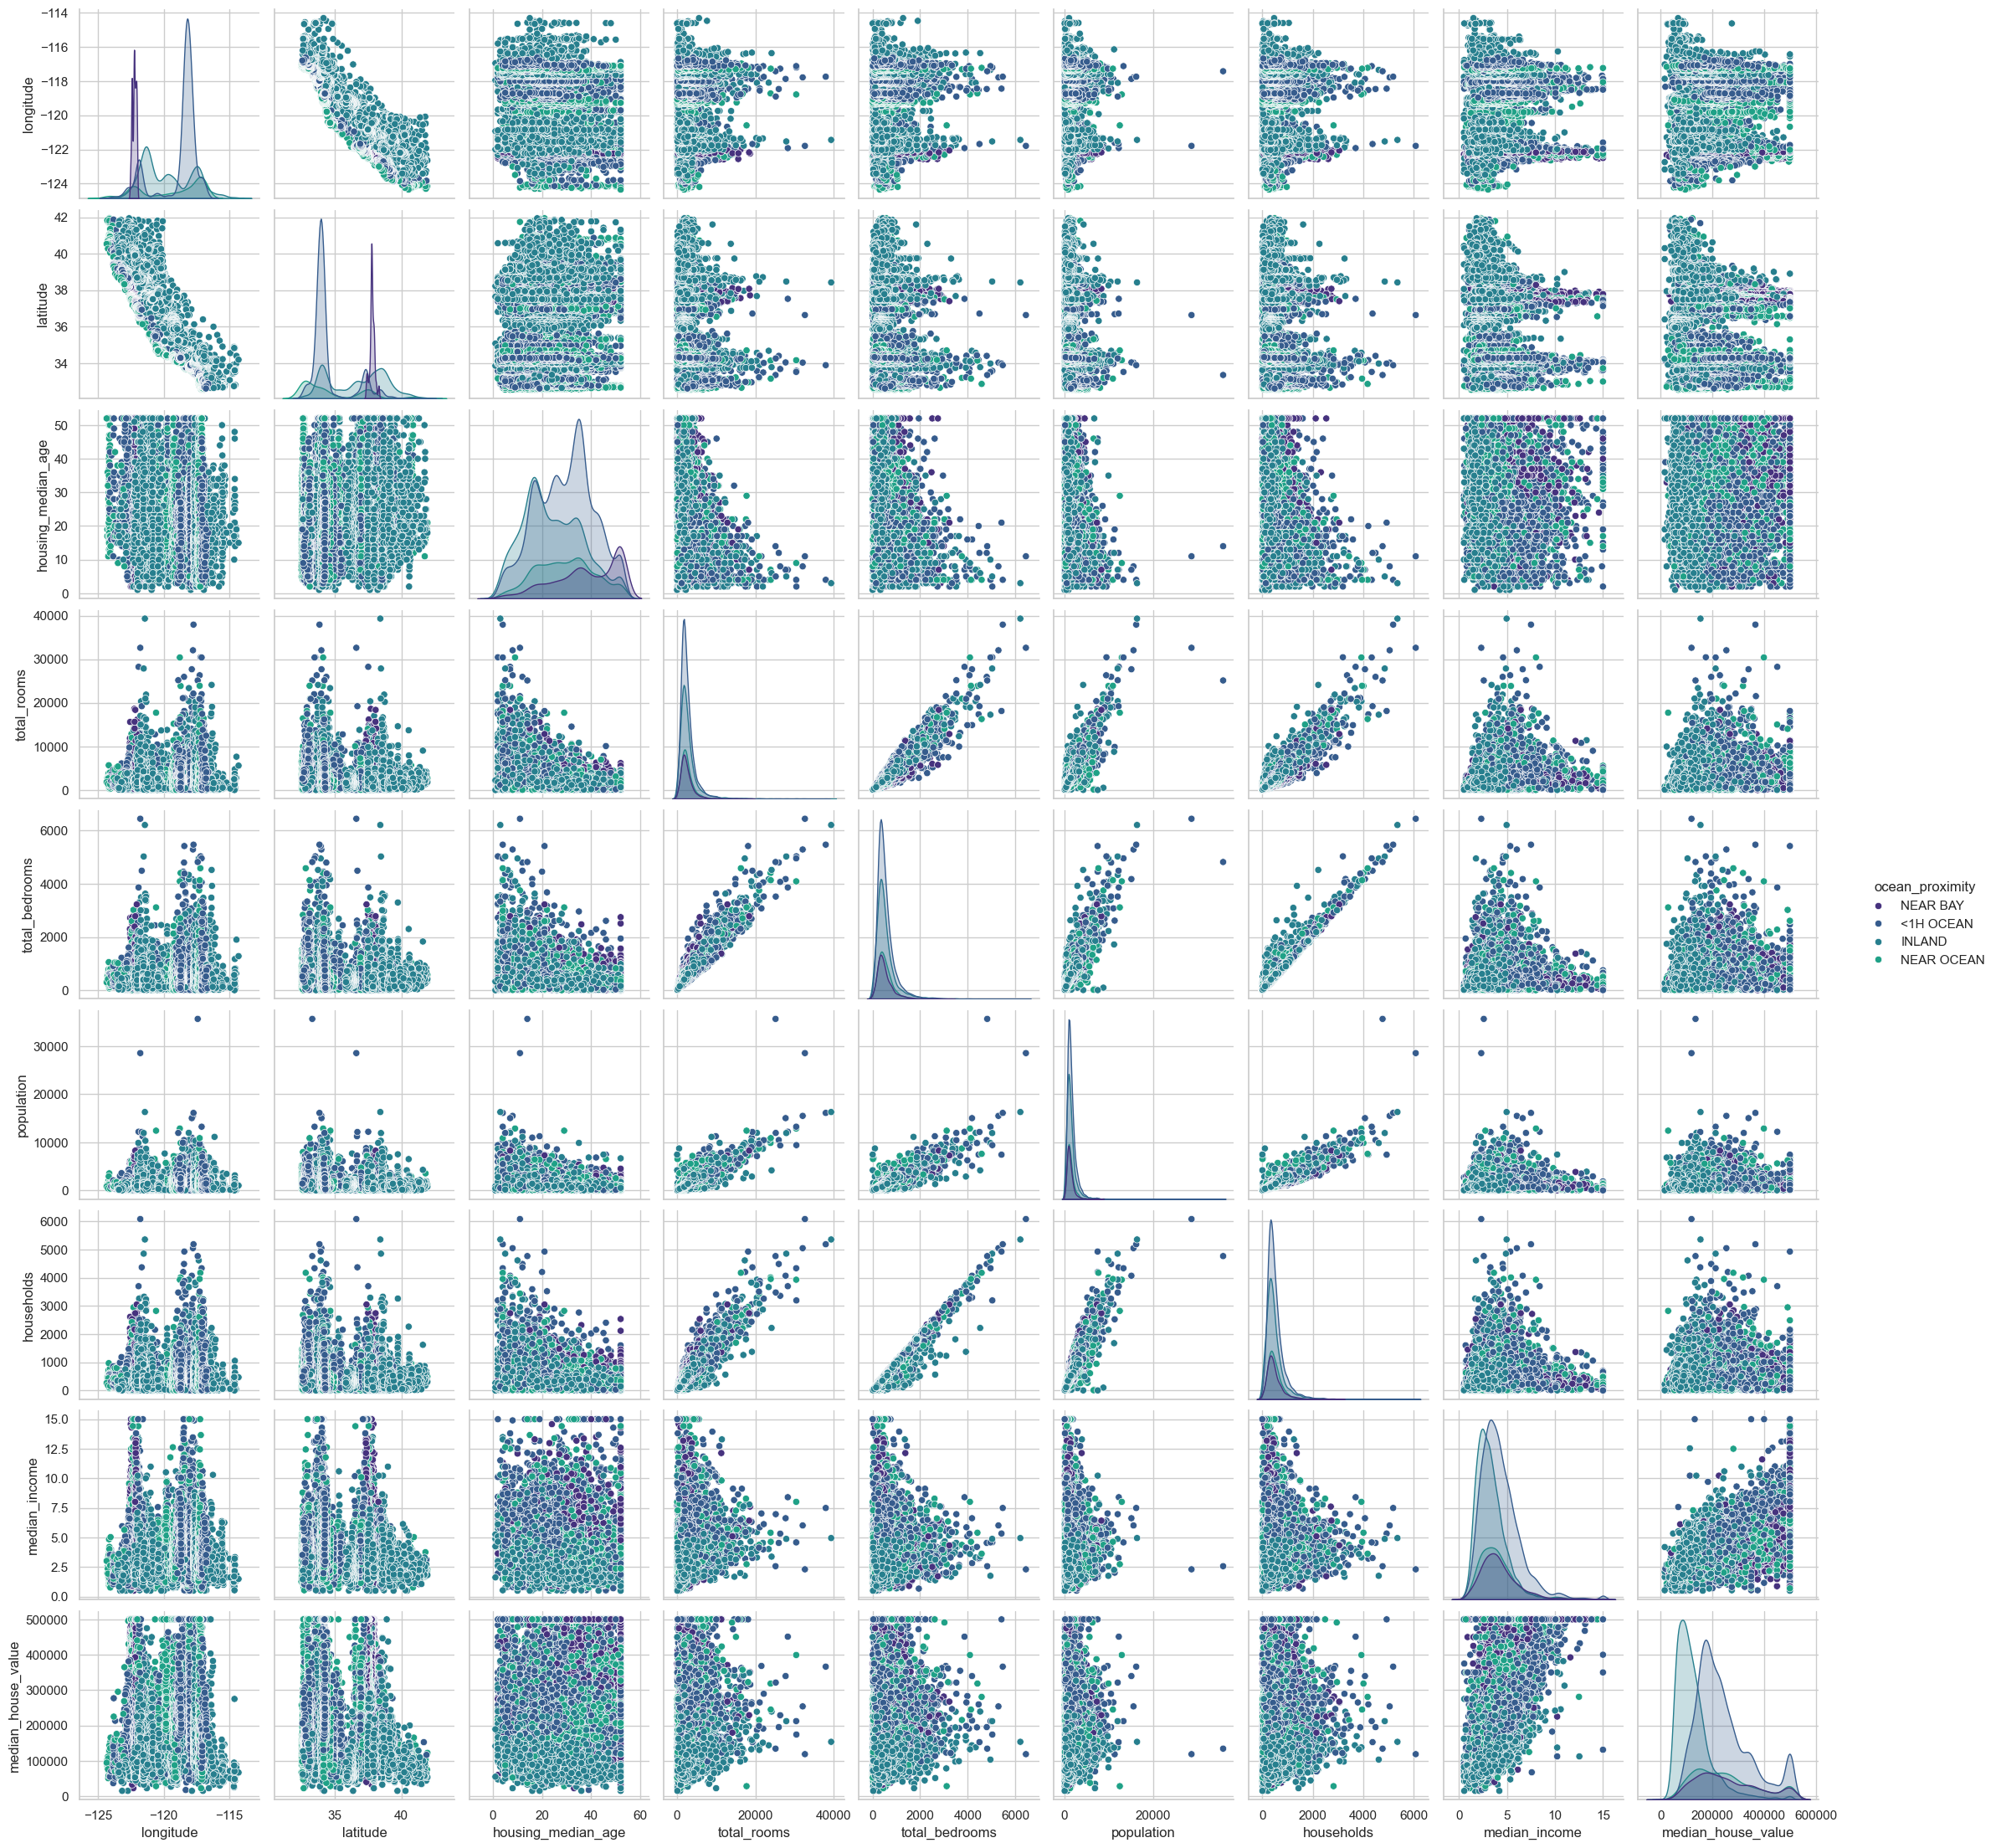

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='ocean_proximity')
plt.show()

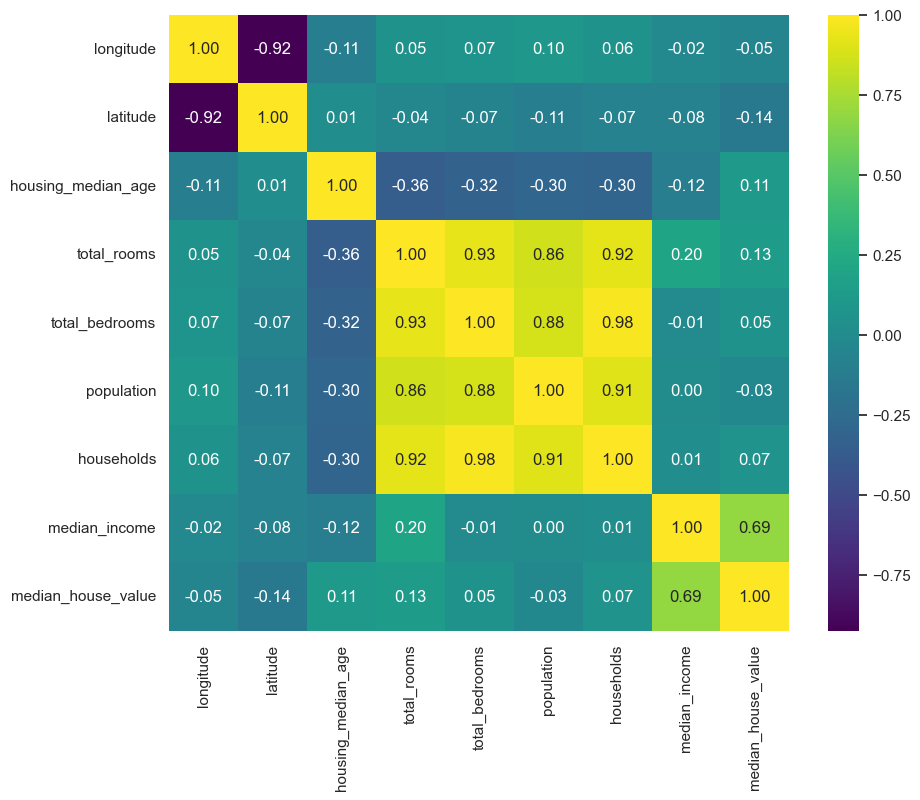

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='viridis')
plt.show()

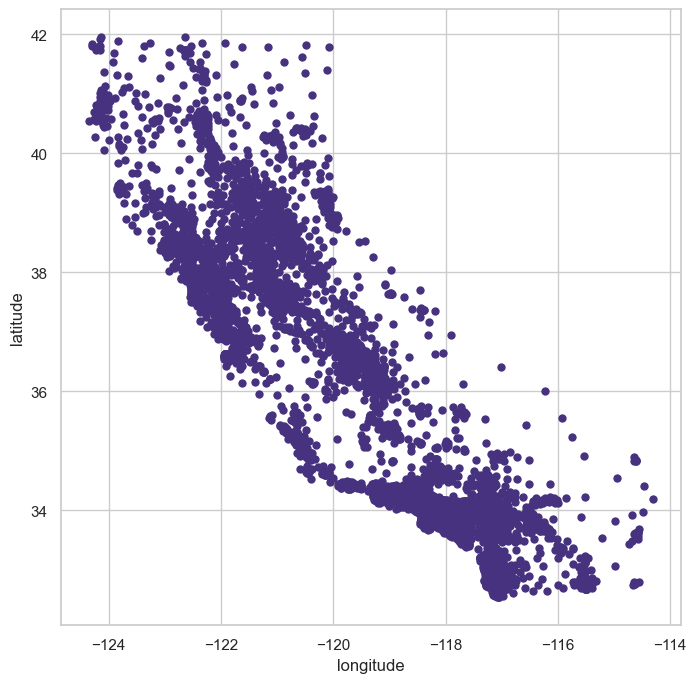

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', linewidth=0)
plt.show()

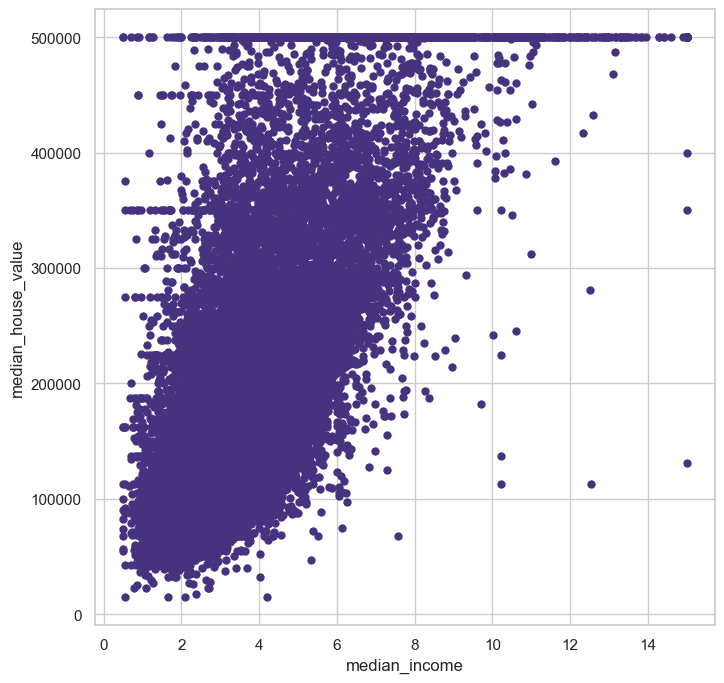

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='median_income', y='median_house_value', linewidth=0)
plt.show()

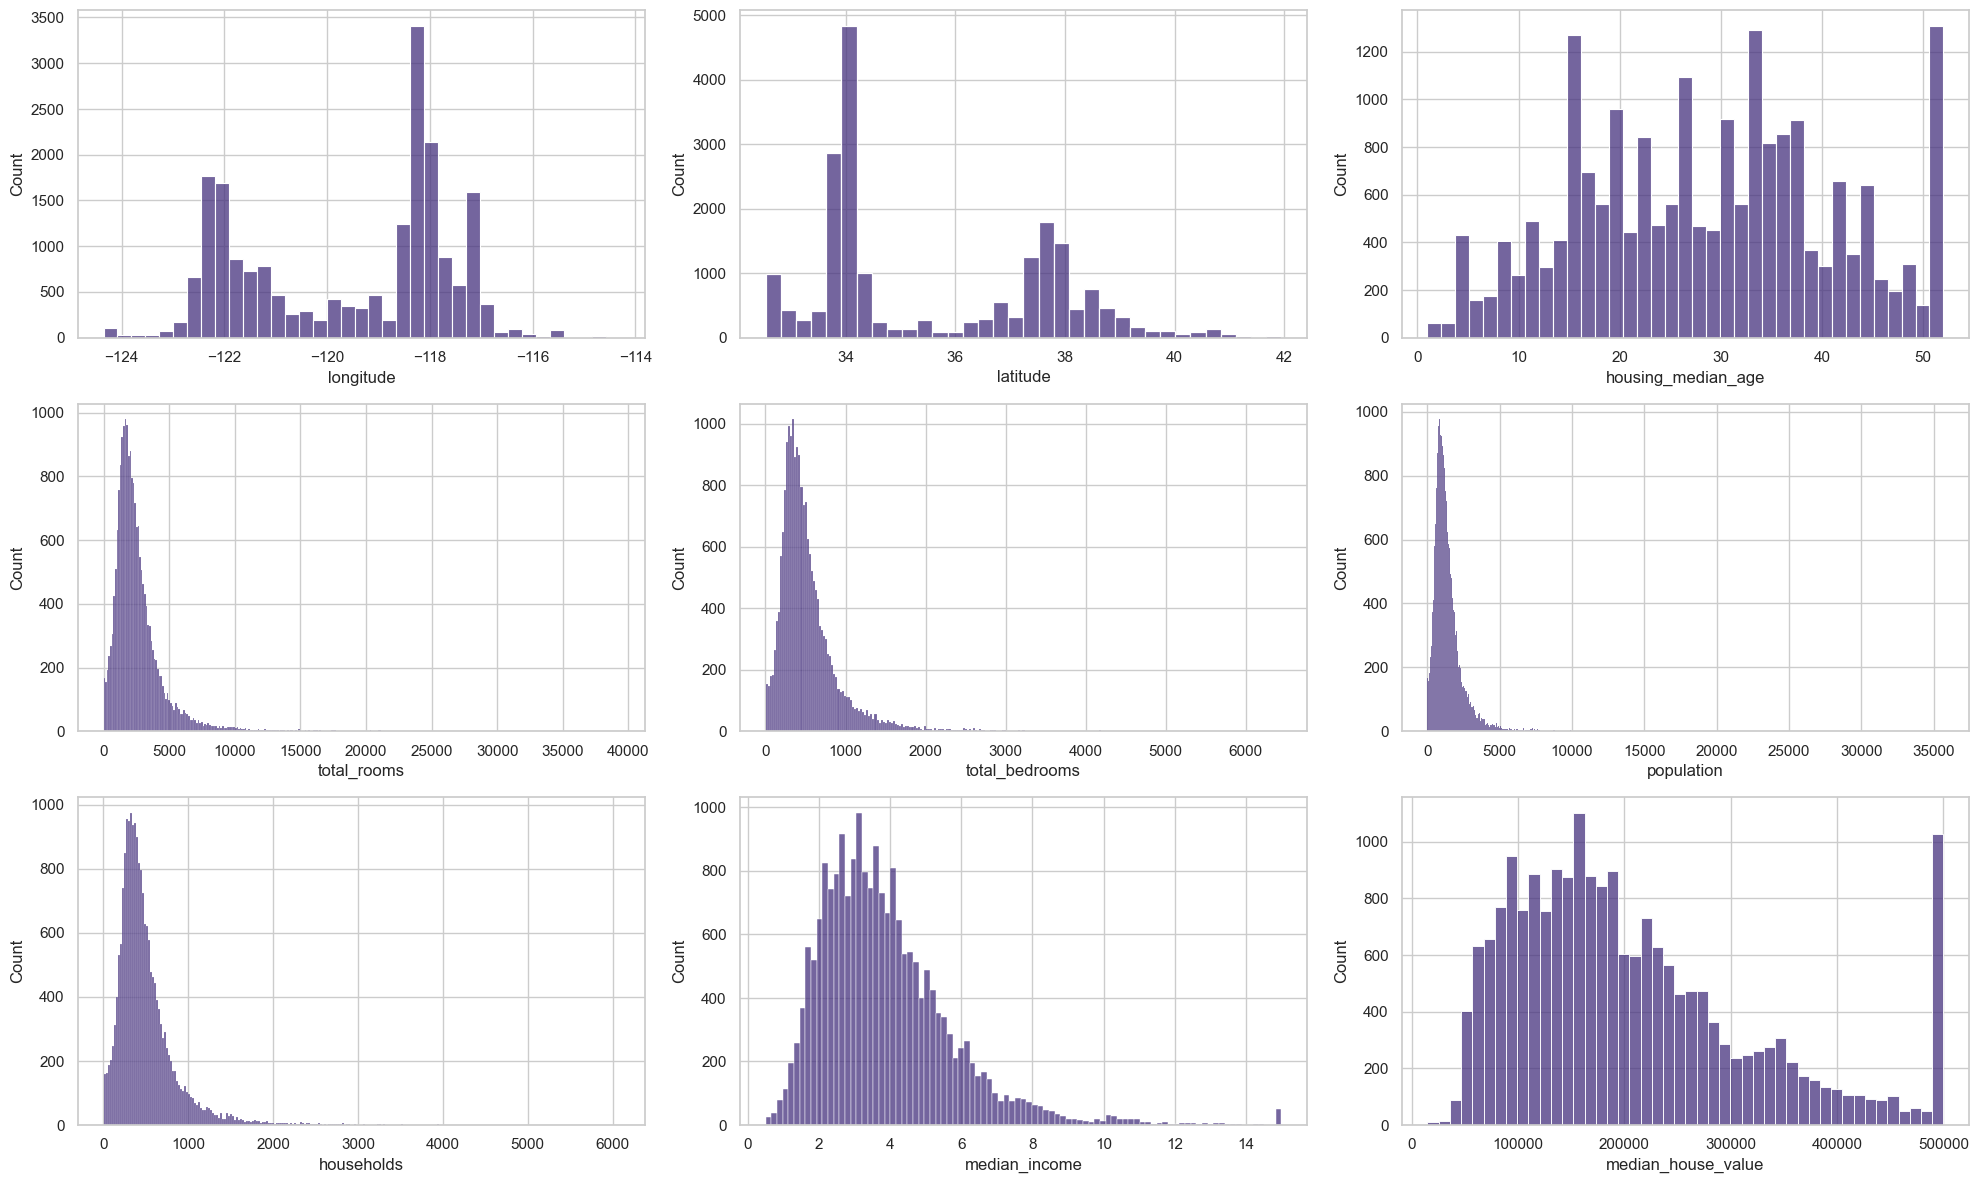

In [ ]:
plt.figure(figsize=(20, 12))
cols = df.columns.to_list()
cols.remove('ocean_proximity')
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(
        df,
        x=col
    )

plt.tight_layout()
plt.show()

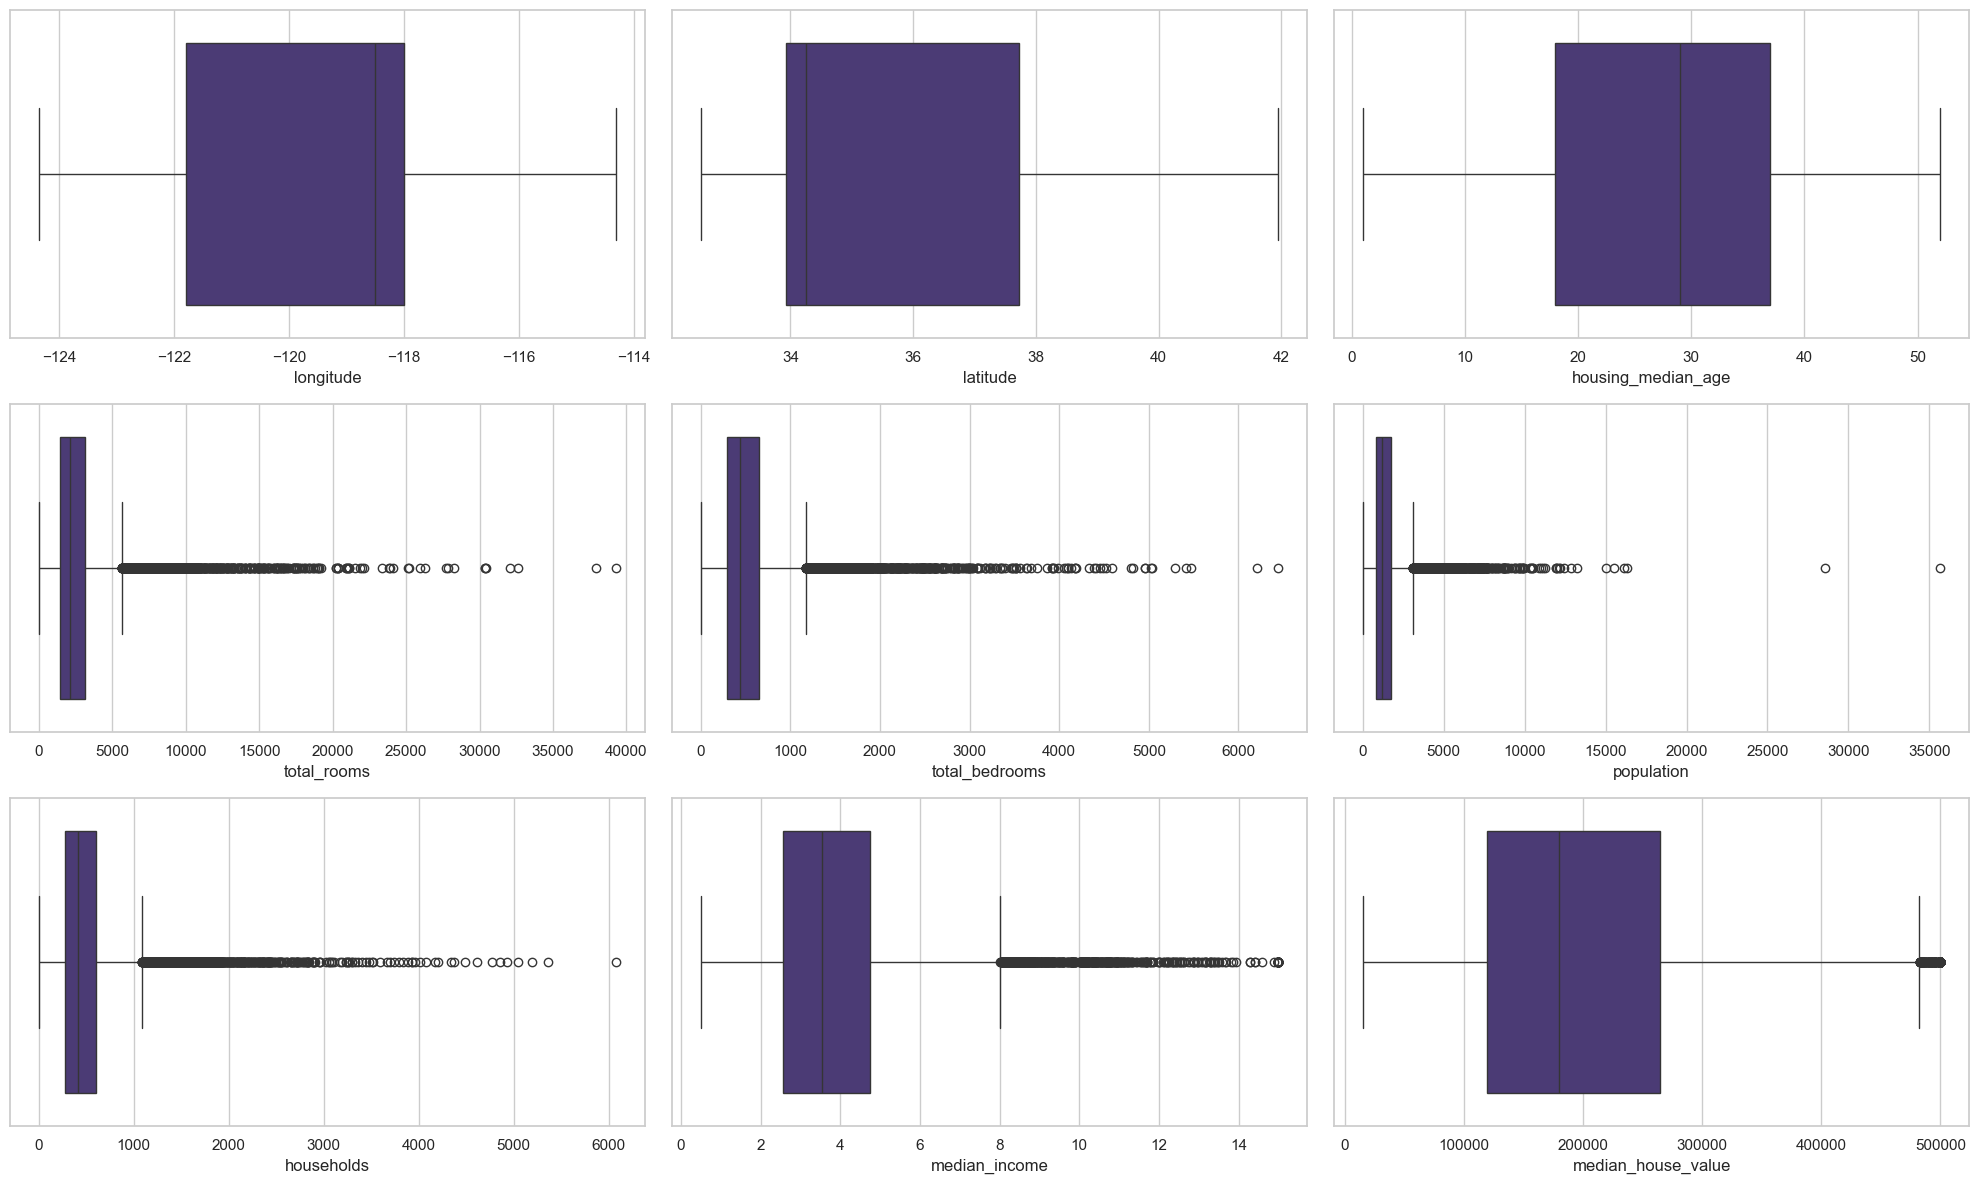

In [ ]:
plt.figure(figsize=(20, 12))
cols = df.columns.to_list()
cols.remove('ocean_proximity')
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(
        df,
        x=col
    )

plt.tight_layout()
plt.show()

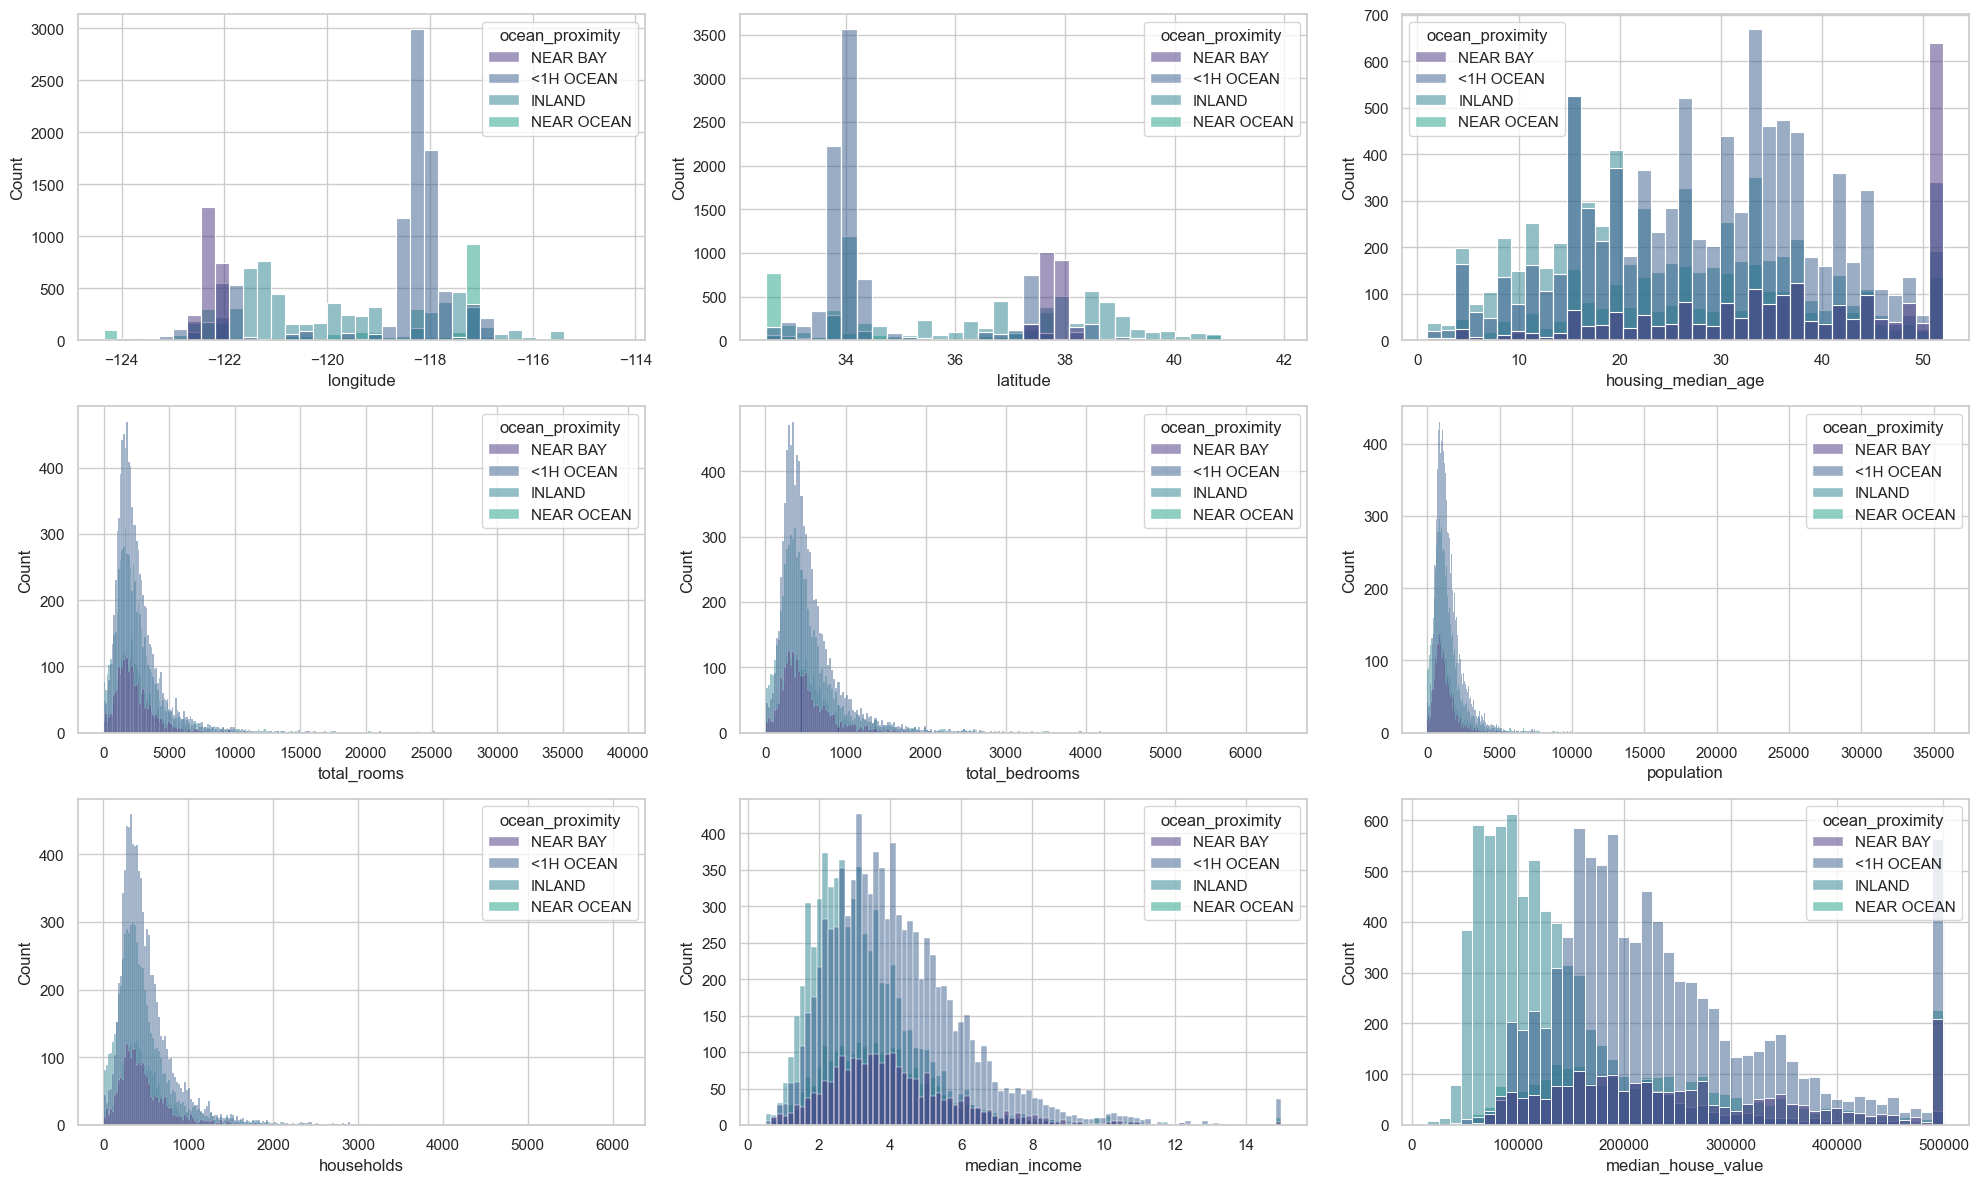

In [ ]:
plt.figure(figsize=(20, 12))
cols = df.columns.to_list()
cols.remove('ocean_proximity')
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(
        df,
        x=col,
        hue='ocean_proximity'
    )

plt.tight_layout()
plt.show()

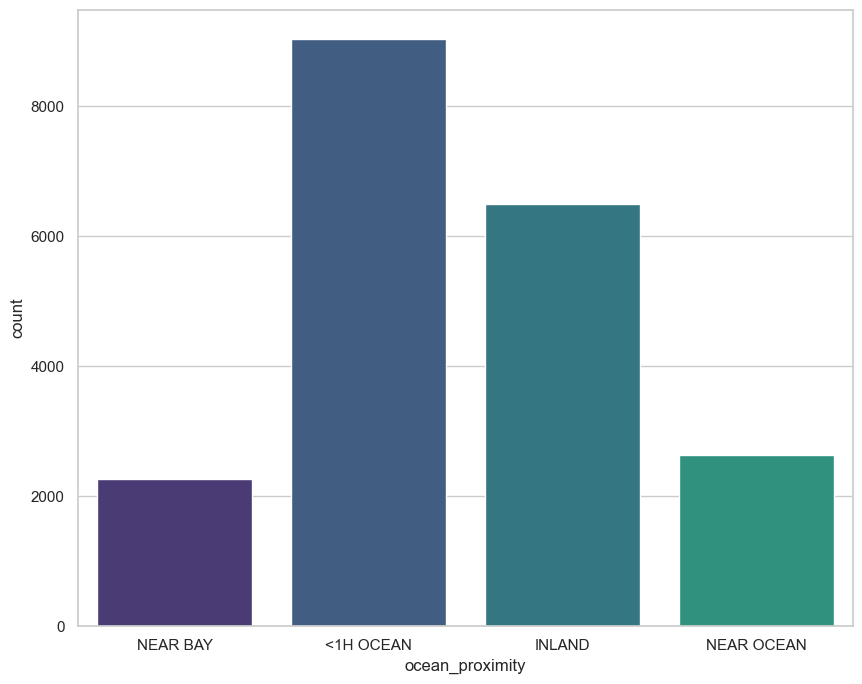

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='ocean_proximity', hue='ocean_proximity')
plt.show()

## Linear Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Train-Test split
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
num_cols = X.columns.to_list()
num_cols.remove('ocean_proximity')

X_scaler = StandardScaler()
X_train[num_cols] = X_scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = X_scaler.transform(X_test[num_cols])

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Encode the categorical variable
enc = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
one_hot_encoded = enc.fit_transform(X_train[['ocean_proximity']].to_numpy())
one_hot_df = pd.DataFrame(one_hot_encoded, columns=enc.get_feature_names_out())
one_hot_df.set_index(X_train.index, inplace=True)          # Matching the indices of the X_train dataset
X_train = pd.concat([X_train, one_hot_df], axis=1)
X_train.drop(['ocean_proximity'], axis=1, inplace=True)

# One hot encoding (transform) the X_test dataset
one_hot_encoded = enc.transform(X_test[['ocean_proximity']].to_numpy())
one_hot_df = pd.DataFrame(one_hot_encoded, columns=enc.get_feature_names_out())
one_hot_df.set_index(X_test.index, inplace=True)           # Matching the indices of the X_test dataset
X_test = pd.concat([X_test, one_hot_df], axis=1)
X_test.drop(['ocean_proximity'], axis=1, inplace=True)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(16342, 4086, 16342, 4086)

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f} \nMSE: {mse:.2f} \nMAE: {mae:.2f} \nR2: {r2:.2f}')

RMSE: 0.60 
MSE: 0.36 
MAE: 0.43 
R2: 0.64


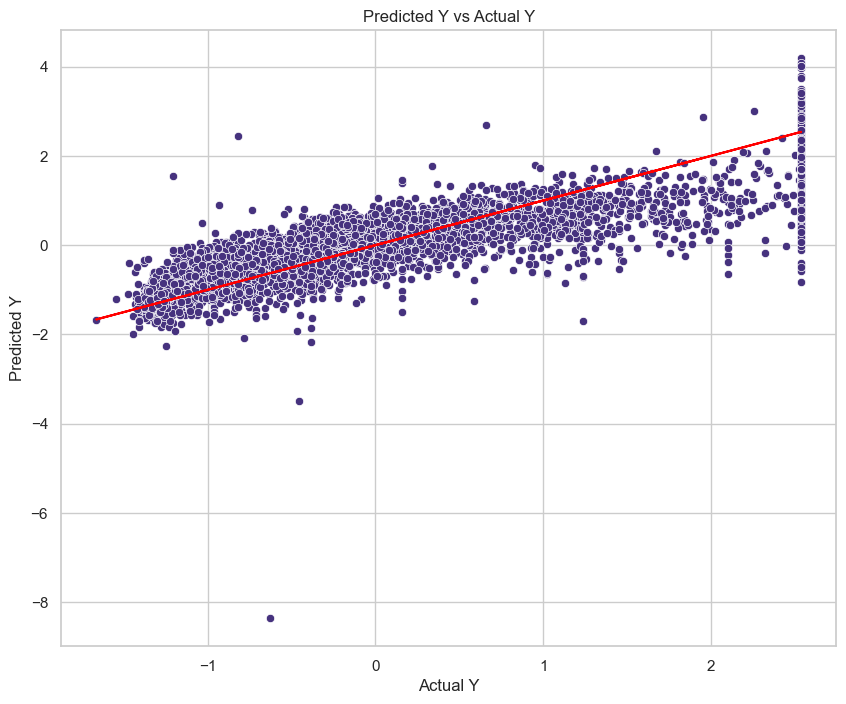

In [ ]:
# Predicted Y vs Actual Y
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test.reshape(-1,), y=y_pred.reshape(-1,), linewidth=0.5)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted Y vs Actual Y')
plt.show()

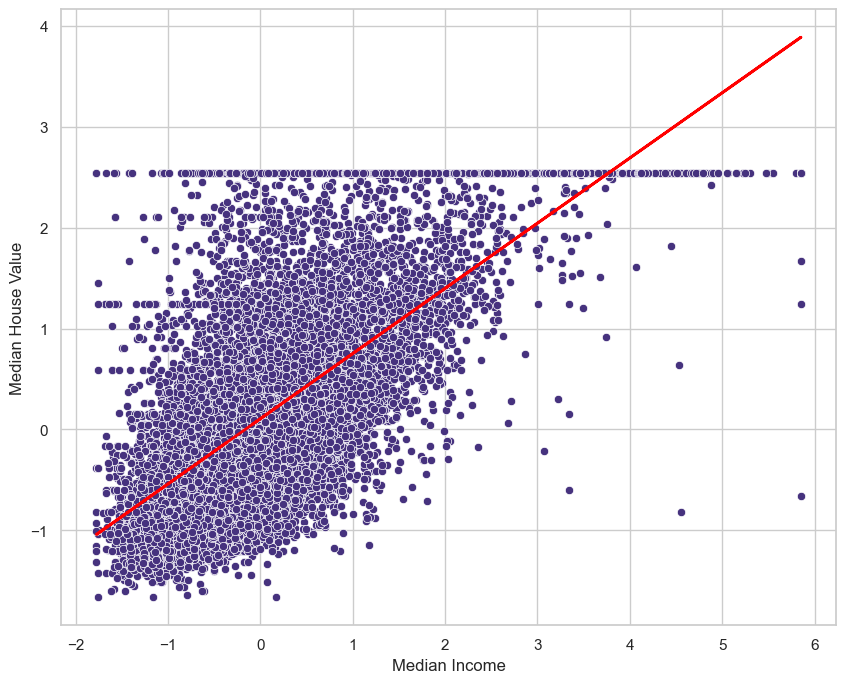

In [ ]:
# Model coefficients and intercept
c1 = lm.coef_[0][X_train.columns.to_list().index('median_income')]
intercept = lm.intercept_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train['median_income'], y=y_train.flatten(), linewidth=0.5)
plt.plot(X_train['median_income'], c1*X_train['median_income'] + intercept, color='red', linewidth=2)    # Regression line
plt.ylabel('Median House Value')
plt.xlabel('Median Income')
plt.show()